In [29]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature


import os
import sys
import json
from zipfile import ZipFile
import time
import base64
from IPython.core.display import HTML

import requests
import warnings
warnings.filterwarnings('ignore')

In [30]:
pip install -U hda

Note: you may need to restart the kernel to use updated packages.


In [31]:
import requests
import tqdm
from hda import Client, Configuration

In [32]:
dataset_id = "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS"

In [33]:
{
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "itemsPerPage": 200,
  "startIndex": 0
}

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'itemsPerPage': 200,
 'startIndex': 0}

In [33]:
data = {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": [
    "monthly_averaged_reanalysis"
  ],
  "variable": [
    "Total Precipitation" , "Snowfall" , "liquid precipitation"
  ],
  "year": [
    "1979",
    "1980",
    "1981",
    "1982",
    "1983",
    "1984",
    "1985",
    "1986",
    "1987",
    "1988",
    "1989",
    "1990",
    "1991",
    "1992",
    "1993",
    "1994",
    "1995",
    "1996",
    "1997",
    "1998",
    "1999",
    "2000",
    "2001",
    "2002",
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
    "2020",
    "2021",
    "2022",
    "2023"
      ],
  
  "month": [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10", 
    "11",
    "12"],
  "time": [
    "00:00",
    "06:00",
    "12:00",
    "18:00"
  ],
  "bbox": [
    -180,
    90,
    180,
    60
  ],
  "format": "netcdf",
  "itemsPerPage": 200,
  "startIndex": 0
}

In [34]:
#def load_data():
conf = Configuration(user = "zcasty", password = "green1234Zaria")
    #hda_client = Client(config = conf)
    #c = Client(debug=True)
c = Client(config=conf, max_workers=12)
matches = c.search(data)
print(matches)
matches.download()

SearchResults[items=1,volume=ND]


In [28]:
# get filename of latest .nc downloaded file 
files = [file for file in os.listdir(".") if (file.lower().endswith('.nc'))]
list_nc_file = []

for file in sorted(files,key=os.path.getmtime, reverse=True):
    list_nc_file.append(file)
    
print(f'Selected netCDF file: {list_nc_file[0]}')  

Selected netCDF file: reanalysis-era5-single-levels-monthly-means-daa9edc6a67cb4f47d7d8f312fb37b04.nc


In [29]:
data

{'dataset_id': 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS',
 'product_type': ['monthly_averaged_reanalysis'],
 'variable': ['Total Precipitation', 'Snowfall', 'liquid precipitation'],
 'year': ['1979',
  '1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022',
  '2023'],
 'month': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12'],
 'time': ['00:00', '06:00', '12:00', '18:00'],
 'bbox': [-180, 90, 180, 60],
 'format': 'netcdf',
 'itemsPerPage': 200,
 'startIndex': 0}

In [30]:
# load file in WEkEO API
#tp is equal to total precipitation
tp = list_nc_file[0]

In [31]:
# Create Xarray Dataset
ds = xr.open_dataset(tp)

In [32]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 121, time: 540)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-26 19:02:35 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [13]:
# Create Xarray Data Array
total_precip = ds['tp']

In [14]:
total_precip

<xarray.DataArray 'tp' (time: 540, latitude: 121, longitude: 1440)>
[94089600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-12-01
Attributes:
    units:      m
    long_name:  Total precipitation

In [15]:
# An array for each year
# (lat, lon, number of years)

all_data = np.zeros((total_precip.shape[1], total_precip.shape[2], 2020 - 1991 + 1)) 

In [17]:
print(f"Shape of total_sum: {total_sum.shape}")
print(f"Shape of monthly_data: {monthly_data.shape}")


Shape of total_sum: (121, 1440)
Shape of monthly_data: (1, 121, 1440)


In [18]:
# Squeeze out the time dimension (if it's size 1) or select the appropriate slice
monthly_data = monthly_data.squeeze()  # This will remove any dimensions of size 1


In [19]:
for yr in range(1991, 2021):
    total_sum = np.zeros((total_precip.shape[1], total_precip.shape[2]))  # Initialize for the year

    for month in range(1, 13):
        monthly_data = total_precip.sel(time=str(yr) + '-' + str(month).zfill(2)).squeeze()  # Fix the shape
        total_sum += monthly_data

    all_data[:, :, x] = total_sum  # Store the yearly sum
    x += 1  # Increment the year counter


In [20]:
print(f"Shape of total_sum: {total_sum.shape}")
print(f"Shape of monthly_data after squeezing: {monthly_data.shape}")


Shape of total_sum: (121, 1440)
Shape of monthly_data after squeezing: (121, 1440)


In [22]:
# Compute the average over the years (along the third dimension)
average_precip = np.mean(all_data, axis=2)  # Average across the year dimension


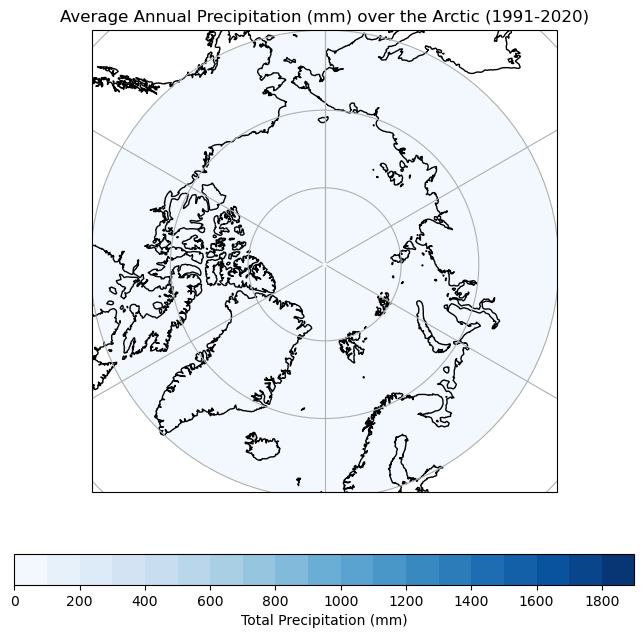

In [23]:
# Set up polar stereographic projection
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Plot the data with contour levels
levels = np.arange(0, 2000, 100)  # Adjust these levels based on your data
cs = ax.contourf(ds['longitude'], ds['latitude'], average_precip,
                 levels=levels, transform=ccrs.PlateCarree(), cmap='Blues')

# Add features and formatting
ax.coastlines()
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.1)
cbar.set_label('Total Precipitation (mm)')

plt.title('Average Annual Precipitation (mm) over the Arctic (1991-2020)')
plt.show()


# Success in Figure 1 & 2

In [37]:
arctic = da.where(da.latitude >= 66.55, drop=True)

In [38]:
arctic_mean_1979_to_2024 = arctic.mean(dim="time") 

In [61]:
arctic_mean_1979_to_2024_in_mm = arctic_mean_1979_to_2024 * 1000 * 1000

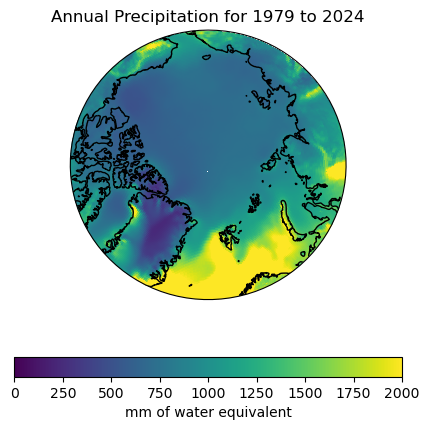

In [69]:
# create the figure panel 
fig = plt.figure(figsize=(5,5))
# create the map using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))
# add coastlines
ax.coastlines()
# compute a circle in axes coordinates, which we can use as a boundary for the map.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# set boundary
ax.set_extent([-180,180, 66.5,90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)      

# provide a title
ax.set_title('Annual Precipitation for 1979 to 2024')
# plot sf
pp = plt.pcolormesh(arctic_mean_1979_to_2024.longitude, arctic_mean_1979_to_2024.latitude,
                    arctic_mean_1979_to_2024_in_mm, cmap='viridis', transform=ccrs.PlateCarree(),
                   vmin=0,vmax=2000)
# add colourbar
cbar = plt.colorbar(pp, orientation='horizontal')
cbar.set_label(label='mm of water equivalent')





In [67]:
# Select data for a specific year, 1991
arctic_1991 = arctic.sel(time=slice('1991-01-01', '1991-12-31'))

# Calculate the mean for this specific year if needed
arctic_mean_1991 = arctic_1991.mean(dim="time")

arctic_mean_1991_in_mm = arctic_mean_1991 *1000 *1000

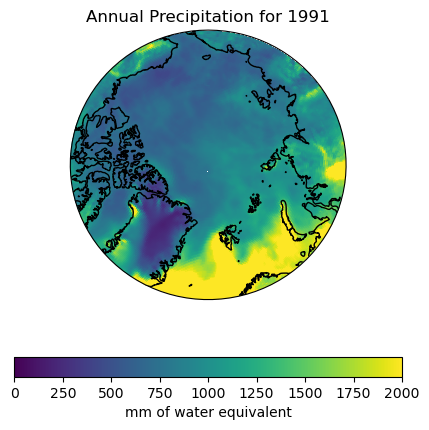

In [70]:
# create the figure panel 
fig = plt.figure(figsize=(5,5))
# create the map using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))
# add coastlines
ax.coastlines()
# compute a circle in axes coordinates, which we can use as a boundary for the map.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# set boundary
ax.set_extent([-180,180, 66.5,90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)   
ax.set_title('Annual Precipitation for 1991')


# Plot the data for 1991
pp = plt.pcolormesh(arctic_mean_1991.longitude, arctic_mean_1991.latitude, 
                    arctic_mean_1991_in_mm, cmap='viridis', transform=ccrs.PlateCarree(),
                    vmin=0, vmax=2000)
# add colourbar
cbar = plt.colorbar(pp, orientation='horizontal')
cbar.set_label(label='mm of water equivalent')

# Conversion for Meters to Inches

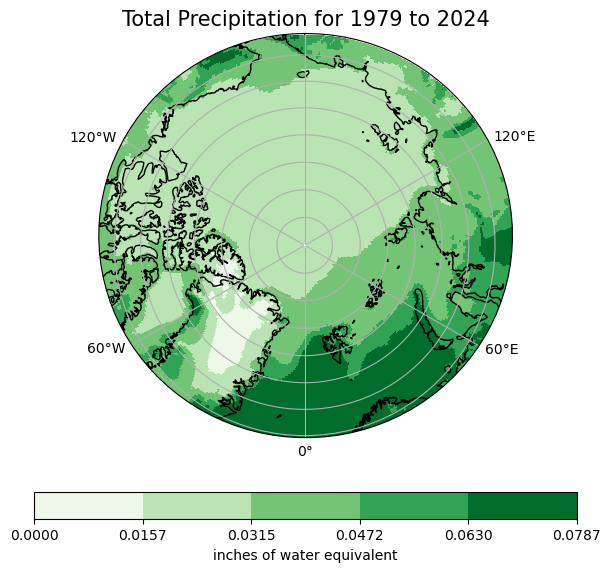

In [29]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Conversion factor from meters to inches
meters_to_inches = 39.3701

# Convert the data from meters to inches
arctic_mean_1979_to_2024_in_inches = arctic_mean_1979_to_2024 * meters_to_inches

# My custom colormap with 5 Green colors
colors = ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c']  
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(0, 0.002 * meters_to_inches, len(colors) + 1), cmap.N)

# Figure panel
fig = plt.figure(figsize=(7, 7))

# Using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(central_latitude=90.0))

# Add coastlines and land features for better context
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Compute a circle in axes coordinates, which we can use as a boundary for the map
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set boundary
ax.set_extent([-180, 180, 66.5, 90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

# Title
ax.set_title('Total Precipitation for 1979 to 2024', fontsize=15)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the data
pp = ax.pcolormesh(arctic_mean_1979_to_2024.longitude, arctic_mean_1979_to_2024.latitude,
                   arctic_mean_1979_to_2024_in_inches, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Add colorbar at the bottom
cbar = plt.colorbar(pp, orientation='horizontal', pad=0.1)
cbar.set_label(label='inches of water equivalent')

# Set the colorbar ticks
tick_values = np.linspace(0, 0.002 * meters_to_inches, 6)
cbar.set_ticks(tick_values)
cbar.ax.set_xticklabels([f'{x:.4f}' for x in tick_values])

plt.show()

##annual average to get monthly 

In [ ]:
arctic_mean_1979_to_2024.shape

# Conversion for Meters to Millimeters

Data range: <xarray.DataArray 'tp' ()>
array(224.38418579) mm to <xarray.DataArray 'tp' ()>
array(6356.83105469) mm


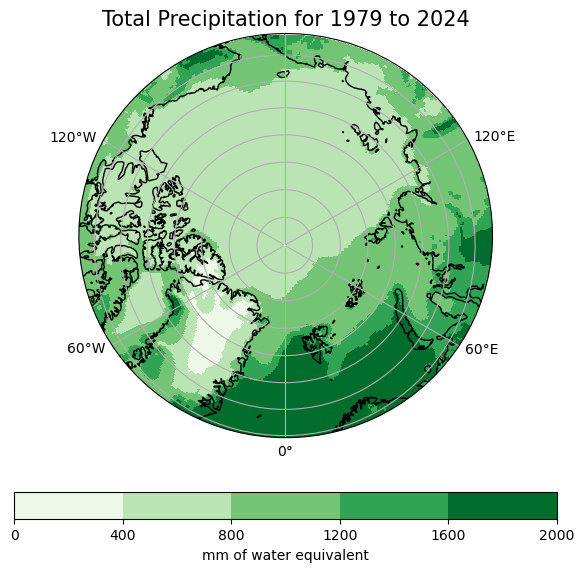

In [31]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Meters to millimeters
meters_to_millimeters = 1000

arctic_mean_1979_to_2024_in_mm = arctic_mean_1979_to_2024 * meters_to_millimeters * meters_to_millimeters

# Data range
data_min = np.min(arctic_mean_1979_to_2024_in_mm)
data_max = np.max(arctic_mean_1979_to_2024_in_mm)
print(f'Data range: {data_min} mm to {data_max} mm')

# Green colors
colors = ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c']  
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(0, 2000, len(colors) + 1), cmap.N)

# Figure panel
fig = plt.figure(figsize=(7, 7))

# Selecting the North Pole
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(central_latitude=90.0))

# Add coastlines and land features 
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Boundary for the map
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set boundary
ax.set_extent([-180, 180, 66.5, 90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

# Title
ax.set_title('Total Precipitation for 1979 to 2024', fontsize=15)

# Gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the data
pp = ax.pcolormesh(arctic_mean_1979_to_2024.longitude, arctic_mean_1979_to_2024.latitude,
                   arctic_mean_1979_to_2024_in_mm, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Add colorbar at the bottom
cbar = plt.colorbar(pp, orientation='horizontal', pad=0.1)
cbar.set_label(label='mm of water equivalent')

# Set the colorbar ticks
tick_values = np.linspace(0, 2000, 6)
cbar.set_ticks(tick_values)
cbar.ax.set_xticklabels([f'{x:.0f}' for x in tick_values])
plt.savefig('total_precip_1979_2024.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
np.any(da_sf>da)

<xarray.DataArray ()>
array(True)

In [51]:
arctic_mean_1979_to_2024.data

array([[0.00070152, 0.00070152, 0.00070152, ..., 0.00070152, 0.00070152,
        0.00070152],
       [0.00069718, 0.00069714, 0.00069712, ..., 0.00069726, 0.00069724,
        0.0006972 ],
       [0.00069948, 0.00069939, 0.00069931, ..., 0.00069974, 0.00069966,
        0.00069958],
       ...,
       [0.00149498, 0.00150351, 0.00149817, ..., 0.00149237, 0.00149304,
        0.00150884],
       [0.00132162, 0.00134386, 0.00136453, ..., 0.00143407, 0.0013899 ,
        0.00135055],
       [0.00147068, 0.00149735, 0.00152366, ..., 0.00146394, 0.0014645 ,
        0.00146773]], dtype=float32)

In [32]:
data = {
  "dataset_id": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "product_type": [
    "monthly_averaged_reanalysis"
  ],
  "variable": [
    "Total Precipitation",
    "Snowfall"
  ],
  "year": [
    "1979",
    "1980",
    "1981",
    "1982",
    "1983",
    "1984",
    "1985",
    "1986",
    "1987",
    "1988",
    "1989",
    "1990",
    "1991",
    "1992",
    "1993",
    "1994",
    "1995",
    "1996",
    "1997",
    "1998",
    "1999",
    "2000",
    "2001",
    "2002",
    "2003",
    "2004",
    "2005",
    "2006",
    "2007",
    "2008",
    "2009",
    "2010",
    "2011",
    "2012",
    "2013",
    "2014",
    "2015",
    "2016",
    "2017",
    "2018",
    "2019",
    "2020",
    "2021",
    "2022",
    "2023"
  ],
  "month": [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
    "09",
    "10", 
    "11",
    "12"
  ],
  "time": [
    "00:00",
    "06:00",
    "12:00",
    "18:00"
  ],
  "bbox": [
    -180,
    90,
    180,
    60
  ],
  "format": "netcdf",
  "itemsPerPage": 200,
  "startIndex": 0
}


In [33]:
# load file in WEkEO API
#sf is equal to snowfall
sf = list_nc_file[0]

In [34]:
# Create Xarray Dataset
ds_sf = xr.open_dataset(sf)

In [35]:
# Create Xarray Data Array
da_sf = ds['sf']

In [41]:
# Convert from meters to millimeters
meters_to_millimeters = 1000
da_sf_mm = da_sf * meters_to_millimeters
da_tp_mm = da * meters_to_millimeters

# Calculate the difference (total rainfall)
da_rainfall_mm = (da_tp_mm - da_sf_mm)

#individually divide by total at the end to get fraction

In [50]:
da.data

array([[[0.00029375, 0.00029375, 0.00029375, ..., 0.00029375,
         0.00029375, 0.00029375],
        [0.00027864, 0.00027864, 0.00027864, ..., 0.00027864,
         0.00027864, 0.00027864],
        [0.00028258, 0.00028258, 0.00028061, ..., 0.00028258,
         0.00028258, 0.00028258],
        ...,
        [0.00317937, 0.00322734, 0.00321946, ..., 0.00272395,
         0.00286853, 0.00301573],
        [0.00314717, 0.00336074, 0.00335877, ..., 0.00263589,
         0.00278112, 0.00293359],
        [0.00307488, 0.00329043, 0.00340675, ..., 0.00266809,
         0.00276207, 0.0028613 ]],

       [[0.00016035, 0.00016035, 0.00016035, ..., 0.00016035,
         0.00016035, 0.00016035],
        [0.00014326, 0.00014326, 0.00014326, ..., 0.00014326,
         0.00014326, 0.00014326],
        [0.00014129, 0.00014129, 0.00014129, ..., 0.00014129,
         0.00014129, 0.00014129],
        ...,
        [0.00211147, 0.00208453, 0.00206021, ..., 0.00216865,
         0.00214959, 0.0021325 ],
        [0.0

In [38]:
da_sf

<xarray.DataArray 'sf' (time: 540, latitude: 121, longitude: 1440)>
array([[[0.000292, 0.000292, ..., 0.000292, 0.000292],
        [0.00028 , 0.00028 , ..., 0.00028 , 0.00028 ],
        ...,
        [0.002572, 0.002777, ..., 0.002227, 0.002369],
        [0.002483, 0.002696, ..., 0.002173, 0.002269]],

       [[0.000159, 0.000159, ..., 0.000159, 0.000159],
        [0.000143, 0.000143, ..., 0.000143, 0.000143],
        ...,
        [0.001166, 0.001142, ..., 0.001232, 0.001196],
        [0.001072, 0.001068, ..., 0.001108, 0.001076]],

       ...,

       [[0.000517, 0.000517, ..., 0.000517, 0.000517],
        [0.000502, 0.000502, ..., 0.000503, 0.000503],
        ...,
        [0.00186 , 0.001902, ..., 0.001826, 0.001826],
        [0.001873, 0.00195 , ..., 0.001772, 0.001795]],

       [[0.000353, 0.000353, ..., 0.000353, 0.000353],
        [0.00035 , 0.00035 , ..., 0.00035 , 0.00035 ],
        ...,
        [0.004696, 0.004729, ..., 0.004701, 0.004669],
        [0.004167, 0.004225, ..., 0.004152, 0.004109]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-12-01
Attributes:
    units:          m of water equivalent
    long_name:      Snowfall
    standard_name:  lwe_thickness_of_snowfall_amount

In [ ]:
da

In [42]:
da_rainfall_mm.data

array([[[ 1.6037226e-03,  1.6037226e-03,  1.6037226e-03, ...,
          1.6037226e-03,  1.6037226e-03,  1.6037226e-03],
        [-1.4845431e-03, -9.8347664e-04, -9.8347664e-04, ...,
         -1.4845431e-03, -1.4845431e-03, -1.4845431e-03],
        [ 9.5555186e-04,  1.4565885e-03, -5.1409006e-04, ...,
          9.5555186e-04,  9.5555186e-04,  9.5555186e-04],
        ...,
        [ 5.5050373e-01,  5.5988955e-01,  5.6603646e-01, ...,
          5.1803231e-01,  5.2981091e-01,  5.3971076e-01],
        [ 5.7492876e-01,  5.8404994e-01,  5.8107734e-01, ...,
          5.4422665e-01,  5.5365634e-01,  5.6480432e-01],
        [ 5.9234071e-01,  5.9441400e-01,  6.0249138e-01, ...,
          5.8243990e-01,  5.8872056e-01,  5.9223914e-01]],

       [[ 9.9651515e-04,  9.9651515e-04,  9.9651515e-04, ...,
          9.9651515e-04,  9.9651515e-04,  9.9651515e-04],
        [-5.4016709e-05, -5.4016709e-05, -5.4016709e-05, ...,
         -5.4016709e-05, -5.4016709e-05, -5.4016709e-05],
        [-5.2340329e-04, 

In [43]:
da_sf.data

array([[[2.9215030e-04, 2.9215030e-04, 2.9215030e-04, ...,
         2.9215030e-04, 2.9215030e-04, 2.9215030e-04],
        [2.8012320e-04, 2.7962215e-04, 2.7962215e-04, ...,
         2.8012320e-04, 2.8012320e-04, 2.8012320e-04],
        [2.8162636e-04, 2.8112531e-04, 2.8112531e-04, ...,
         2.8162636e-04, 2.8162636e-04, 2.8162636e-04],
        ...,
        [2.6288638e-03, 2.6674503e-03, 2.6534190e-03, ...,
         2.2059204e-03, 2.3387168e-03, 2.4760235e-03],
        [2.5722375e-03, 2.7766945e-03, 2.7776966e-03, ...,
         2.0916658e-03, 2.2274684e-03, 2.3687836e-03],
        [2.4825381e-03, 2.6960140e-03, 2.8042551e-03, ...,
         2.0856522e-03, 2.1733474e-03, 2.2690613e-03]],

       [[1.5935302e-04, 1.5935302e-04, 1.5935302e-04, ...,
         1.5935302e-04, 1.5935302e-04, 1.5935302e-04],
        [1.4331751e-04, 1.4331751e-04, 1.4331751e-04, ...,
         1.4331751e-04, 1.4331751e-04, 1.4331751e-04],
        [1.4181435e-04, 1.4131330e-04, 1.4131330e-04, ...,
         1.418

In [44]:
da_rainfall_mm

<xarray.DataArray (time: 540, latitude: 121, longitude: 1440)>
array([[[ 1.6037226e-03,  1.6037226e-03,  1.6037226e-03, ...,
          1.6037226e-03,  1.6037226e-03,  1.6037226e-03],
        [-1.4845431e-03, -9.8347664e-04, -9.8347664e-04, ...,
         -1.4845431e-03, -1.4845431e-03, -1.4845431e-03],
        [ 9.5555186e-04,  1.4565885e-03, -5.1409006e-04, ...,
          9.5555186e-04,  9.5555186e-04,  9.5555186e-04],
        ...,
        [ 5.5050373e-01,  5.5988955e-01,  5.6603646e-01, ...,
          5.1803231e-01,  5.2981091e-01,  5.3971076e-01],
        [ 5.7492876e-01,  5.8404994e-01,  5.8107734e-01, ...,
          5.4422665e-01,  5.5365634e-01,  5.6480432e-01],
        [ 5.9234071e-01,  5.9441400e-01,  6.0249138e-01, ...,
          5.8243990e-01,  5.8872056e-01,  5.9223914e-01]],

       [[ 9.9651515e-04,  9.9651515e-04,  9.9651515e-04, ...,
          9.9651515e-04,  9.9651515e-04,  9.9651515e-04],
        [-5.4016709e-05, -5.4016709e-05, -5.4016709e-05, ...,
         -5.4016709e-05, -5.4016709e-05, -5.4016709e-05],
        [-5.2340329e-04, -2.2351742e-05, -2.2351742e-05, ...,
         -5.2340329e-04, -5.2340329e-04, -5.2340329e-04],
...
        [ 1.7579746e+00,  1.7537010e+00,  1.7512774e+00, ...,
          1.9126983e+00,  1.8223543e+00,  1.7879746e+00],
        [ 1.9586403e+00,  1.9316616e+00,  1.9258261e+00, ...,
          2.1538463e+00,  2.0630331e+00,  1.9754739e+00],
        [ 2.1688929e+00,  2.1010756e+00,  2.0865917e+00, ...,
          2.3829460e+00,  2.3092024e+00,  2.2353938e+00]],

       [[ 1.1360645e-04,  1.1360645e-04,  1.1360645e-04, ...,
          1.1360645e-04,  1.1360645e-04,  1.1360645e-04],
        [-1.3243556e-03, -1.3243556e-03, -1.3243556e-03, ...,
         -8.2328916e-04, -8.2328916e-04, -1.3243556e-03],
        [ 1.1360645e-04,  1.1360645e-04,  1.1360645e-04, ...,
          6.1464310e-04,  6.1464310e-04,  6.1464310e-04],
        ...,
        [ 5.9889793e-02,  5.8517933e-02,  5.7467461e-02, ...,
          6.4759254e-02,  5.8332443e-02,  6.0214520e-02],
        [ 1.1003065e-01,  1.1213255e-01,  1.0665035e-01, ...,
          1.1444092e-01,  1.1340809e-01,  1.1014843e-01],
        [ 1.8035555e-01,  1.7939758e-01,  1.8414497e-01, ...,
          1.8289089e-01,  1.8108702e-01,  1.8015194e-01]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 60.5 60.25 60.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-12-01

In [45]:
da_rainfall_mm.sel(time=slice("1979","2023")).shape

(540, 121, 1440)

In [46]:
da_rainfall_mm[:-1][0].shape

(121, 1440)

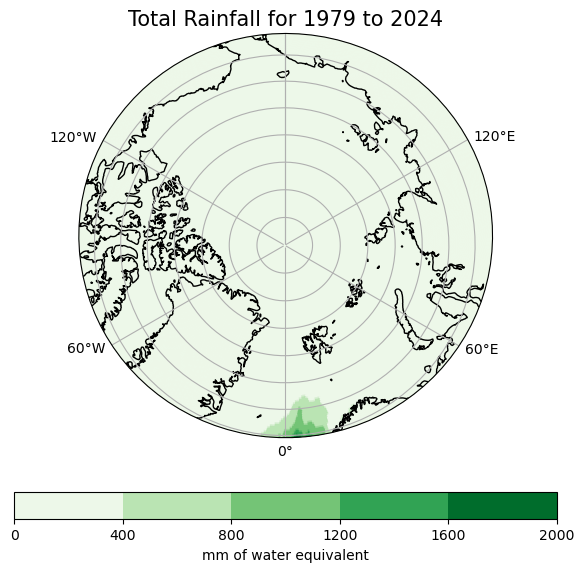

In [48]:
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c']  
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(0, 2000, len(colors) + 1), cmap.N)

# Figure panel
fig = plt.figure(figsize=(7, 7))

# Cartopy Orthographic projection
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(central_latitude=90.0))

# Add coastlines and land features
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

# Boundary for map
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set boundary
ax.set_extent([-180, 180, 66.5, 90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

# Title
ax.set_title('Total Rainfall for 1979 to 2024', fontsize=15)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

da_rainfall_mm_ = da_rainfall_mm.sel(time=slice("1979","2023"))[:-1][0] * 1000

# Plot the data
pp = ax.pcolormesh(da_rainfall_mm_.longitude, da_rainfall_mm_.latitude,
                   da_rainfall_mm_, cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading="gouraud")

# Add colorbar at the bottom
cbar = plt.colorbar(pp, orientation='horizontal', pad=0.1)
cbar.set_label(label='mm of water equivalent')

# Set the colorbar ticks
tick_values = np.linspace(0, 2000, 6)
cbar.set_ticks(tick_values)
cbar.ax.set_xticklabels([f'{x:.0f}' for x in tick_values])

plt.savefig('total_rainfall_1979_2024.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Conversion factor from meters to millimeters
meters_to_millimeters = 1000

# Filter the data for total precipitation (tp) for July only
tp_july = ds['tp'].sel(time=ds['time.month'] == 7)

# Convert the data
tp_july_mean_in_mm = tp_july_mean * meters_to_millimeters *1000

#minimum and maximum values
data_min = tp_july_mean_in_mm.min().item()
data_max = tp_july_mean_in_mm.max().item()
print(f'Total Precipitation for July')
print(f'Min: {data_min} mm')
print(f'Max: {data_max} mm')

# Custom colormap with 5 Green colors
colors = ['#edf8e9', '#bae4b3', '#74c476', '#31a354', '#006d2c']

cmap = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(0, 2000, len(colors) + 1), cmap.N)

# Figure panel
fig = plt.figure(figsize=(7, 7))

# Using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(central_latitude=90.0))

# Add coastlines and land features for better context
ax.coastlines()
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# Set boundary
ax.set_extent([-180, 180, 66.5, 90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

# Title
ax.set_title('Total Precipitation for July', fontsize=15)

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the data
pp = ax.pcolormesh(tp_july_mean.longitude, tp_july_mean.latitude,
                   tp_july_mean_in_mm[1], cmap=cmap, norm=norm, transform=ccrs.PlateCarree(), shading="gouraud")

# Add colorbar at the bottom
cbar = plt.colorbar(pp, orientation='horizontal', pad=0.1)
cbar.set_label(label='mm of water equivalent')

# Set the colorbar ticks
tick_values = np.linspace(0, 2000, 6)
cbar.set_ticks(tick_values)
cbar.ax.set_xticklabels([f'{x:.0f}' for x in tick_values])

# Save the figure
#plt.savefig("total_precipitation_july.png", dpi=300, bbox_inches='tight')

plt.show()


NameError: name 'tp_july_mean' is not defined

In [ ]:
tp_july_mean_in_mm.shape

In [ ]:
df = tp_july_mean_in_mm

In [ ]:
print(df.describe())

In [ ]:
#large scale + convection = rainfall